<a href="https://colab.research.google.com/github/manm0han/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

**Importing libraries and data**

In [50]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [51]:
# Mounting drives
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Storing the dataset in a dataframe.
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Regression capstone project/Taxi time prediction project/Copy of NYC Taxi Data.csv')

In [53]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [54]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Using the info() function we can see that the dataframe has 8 columns and 1458644 rows. None of them have got null values.

**Univariate analysis**

1. Passenger count

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


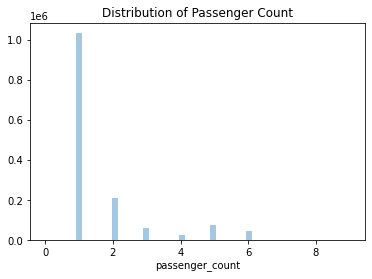

In [56]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

From the above graph we can see that mostly a single person avails the cab.

2. Pickup and drop off day of the week.

To make better use of datetime we split it into day, time of day and month.

In [57]:
# Converting datetime from string to datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [58]:
# Extracting week day from datetime and storing it in new columns
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

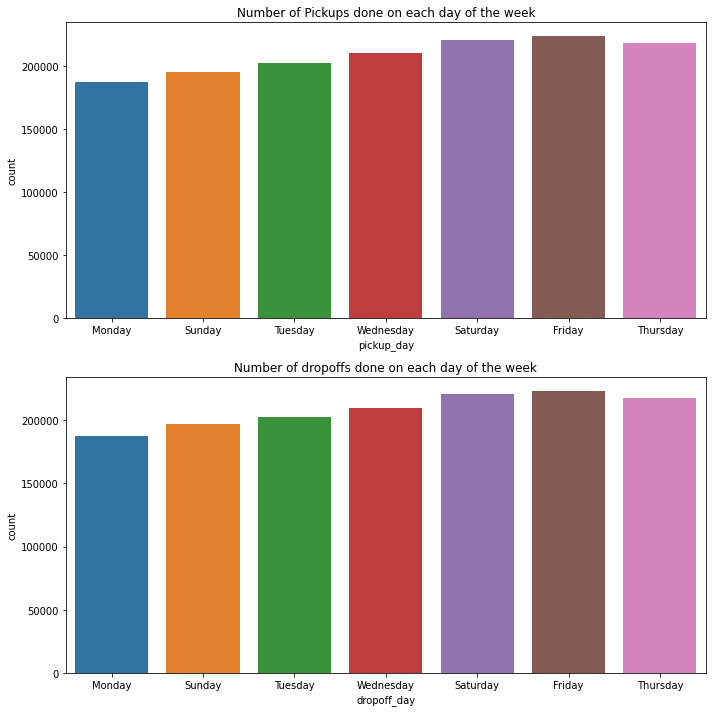

In [59]:
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

Trips taken on Friday is the highest and on Monday is the lowest.

3. Pickup and Drop Off hours of the day

In [60]:
# Function to split time in datetime to morning, midday, evening and night
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

In [61]:
# Applying the above function and storing the time of day in separate columns
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

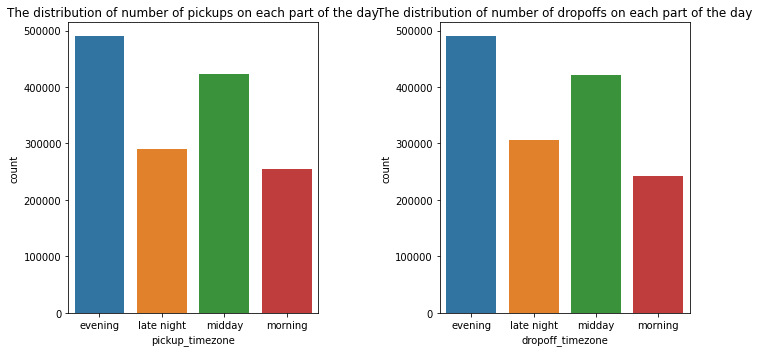

In [62]:
# Plotting the distribution for time of the day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10.5,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

4. Distribution of the stored and forward flag

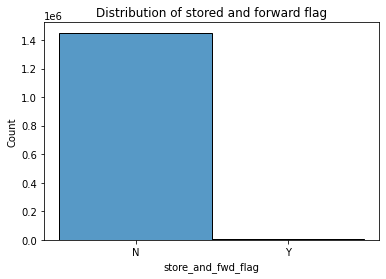

In [63]:
sns.histplot(df['store_and_fwd_flag'],kde=False)
plt.title('Distribution of stored and forward flag')
plt.show()

Majority was not stored, it was immediately sent to the vendor.

5. Trip duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of trip duration')

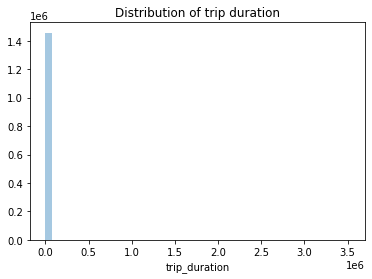

In [64]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('Distribution of trip duration')

We can see there are outliers. This will be dealt with in the feature engineering section.

6. Vendor id

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


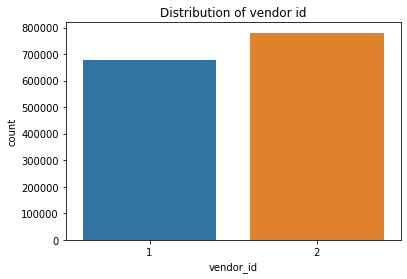

In [65]:
sns.countplot(df['vendor_id'])
plt.title('Distribution of vendor id')
plt.show()

**Bivariate analysis**

1. Trip duration and Day of the week

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

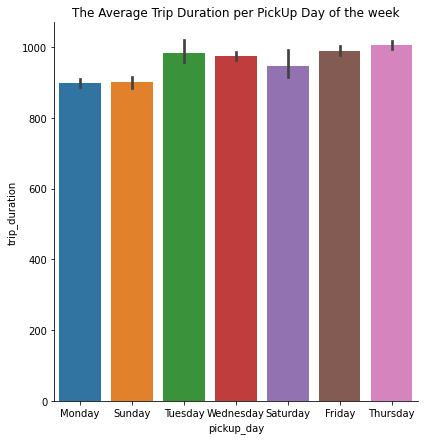

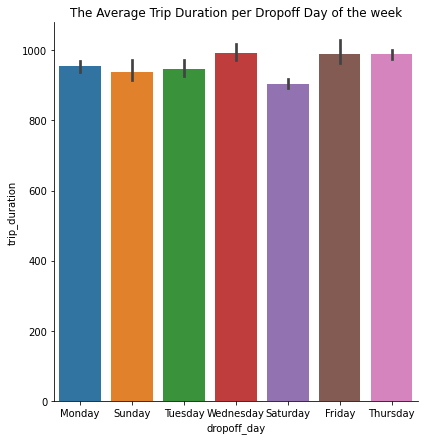

In [66]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

2. Trip duration and time of the day

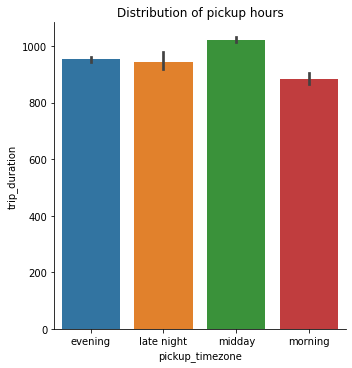

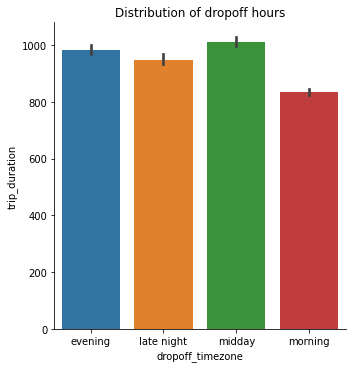

In [67]:
sns.catplot(x="pickup_timezone", y="trip_duration",kind="bar",data=df)
plt.title('Distribution of pickup hours')
sns.catplot(x="dropoff_timezone", y="trip_duration",kind="bar",data=df)
plt.title('Distribution of dropoff hours')
plt.show()

3. Trip duration and passenger count

Text(0.5, 1.0, 'Passenger count vs trip duration')

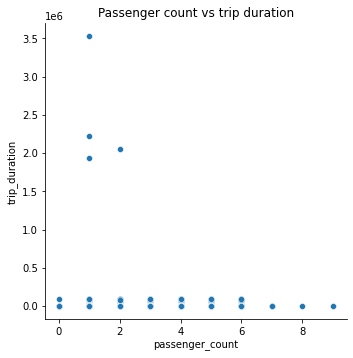

In [68]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")
plt.title('Passenger count vs trip duration')

Passenger count appears to have no relation to the trip duration.

4. Trip duration and vendor id

Text(0.5, 1.0, 'Vendor id vs trip duration')

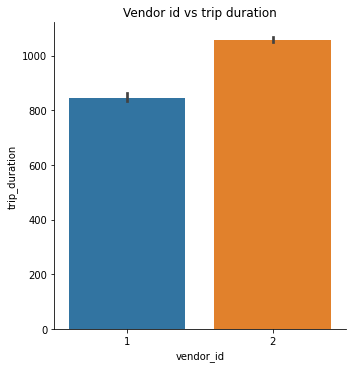

In [69]:
sns.catplot(x="vendor_id", y="trip_duration",kind="bar",data=df)
plt.title('Vendor id vs trip duration')

Vendor 2 has provided the most number of trips.

5. Store forward flag and duration

Text(0.5, 1.0, 'Store and forward flag vs trip duration')

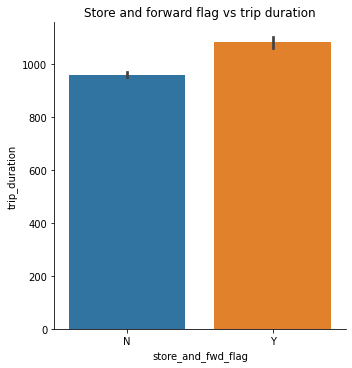

In [70]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="bar",data=df)
plt.title('Store and forward flag vs trip duration')

From the above analysis we can infer that:
1. Passenger count and store forward flag does not show any trend with respect to trip duration.
2. Trip duration has extreme outliers.
3. Most number of trips are taken on Fridays and the least on Mondays.
4. Higher number of trips are taken on evenings and midday.
5. Vendor 2 provides more trips than vendor 1.


**Feature Engineering**

Calculating distance<br>
Using the latitudes and longitudes in the dataset we can calculate distance using the Haversine formula.

In [22]:
# Function to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [44]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

Calculating month<br>
We extract month from the datetime column.

In [45]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

We get rid of the id, passenger count, store and forward flag columns because they show no trend with respect to trip duration. We delete the datetime and coordinates columns as we have got all the required information from them.

In [46]:
df = df.drop(['pickup_datetime', 'dropoff_datetime',	'pickup_longitude',	'pickup_latitude',	'dropoff_longitude',	'dropoff_latitude', 'id', 'passenger_count', 'store_and_fwd_flag'], axis = 1)

One hot encoding of all the categorical variables.

In [47]:
df = pd.get_dummies(df, columns = ['vendor_id',	'pickup_day',	'dropoff_day', 'pickup_month',	'dropoff_month',	'pickup_timezone',	'dropoff_timezone'])

Handling outliers in duration and distance.<br>
By examining the distribution plots we found that there were many outliers. Both the columns even had zeros, which cannot be valid. Most of the trips were within 5 miles and less than half an hour. Therefore, we only considered trips within these limits.

In [ ]:
df = df[df.distance != 0]

In [ ]:
df = df[df.trip_duration != 0]

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2[df2['trip_duration'] < 2000]

In [ ]:
df2 = df2[df2['distance'] < 5]

In [ ]:
df2.head()

,trip_duration,distance,vendor_id_1,vendor_id_2,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,...,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
0,455,0.931401,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,663,1.122207,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,429,0.923307,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,435,0.738763,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,443,0.683044,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


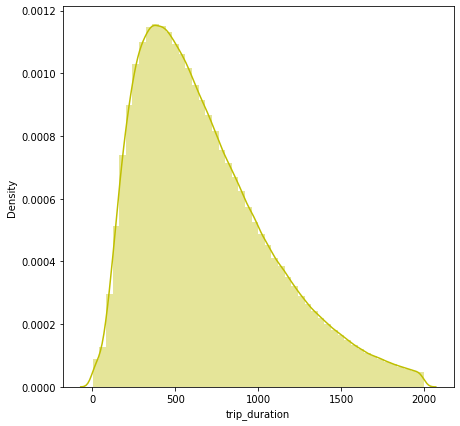

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df2.trip_duration,color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


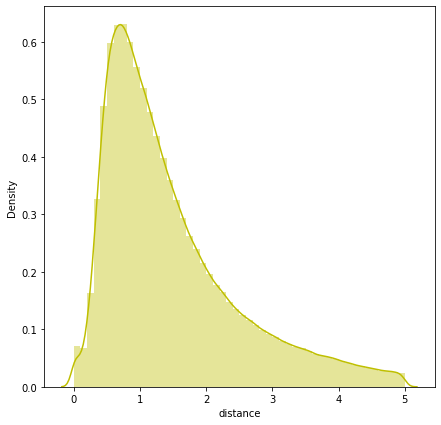

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df2.distance,color="y")

Since we have taken care of outliers we can proceed to train models.

The dependent variable is trip_duration and the rest are independent.

In [ ]:
dependent_variables = 'trip_duration'

In [ ]:
independent_variables = list(set(df.columns) - {'trip_duration'})

In [ ]:
X = df2[independent_variables].values

In [ ]:
y = df2[dependent_variables].values

Splitting the dataset in a 80:20 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)

Transforming the dataset using minmax scaler function.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Linear Regression**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_train, y_pred_train)

76136.68284642627

In [ ]:
mean_squared_error(y_test, y_pred_test)

76083.69689300704

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

275.92876407947443

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_test))

275.832733541556

In [ ]:
r2_score(y_train, y_pred_train)

0.5252097652611888

In [ ]:
r2_score(y_test, y_pred_test)

0.5240266652843174

**XGB Regressor**

In [ ]:
xgr = XGBRegressor(random_state = 42, n_jobs = -1).fit(X_train, y_train)

[12:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred_train_xgb = xgr.predict(X_train)

In [ ]:
y_pred_test_xgb = xgr.predict(X_test)

In [ ]:
mean_squared_error(y_train, y_pred_train_xgb)

69120.13947622558

In [ ]:
mean_squared_error(y_test, y_pred_test_xgb)

68882.8387544536

In [ ]:
math.sqrt(mean_squared_error(y_train, y_pred_train_xgb))

262.9070928602452

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

262.4554033630354

In [ ]:
r2_score(y_train, y_pred_train_xgb)

0.5689651030201546

In [ ]:
r2_score(y_test, y_pred_test_xgb)

0.5690746400934498

**Ridge regression**

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -76142.77098198654


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
#print("Adjusted R2 : ",1-((1-r2_score(y_test), y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 76082.56508813432
RMSE : 275.83068191942374
R2 : 0.5240337457622846


**Results:**

Model               | RMSE of test data | 
--------------------|-------------------|
Linear Regression   |      275.83       |
XGB Regressor       |      262.45       |
Ridge Regression    |      275.83       |


**Conclusion:**

The lowest RMSE obtained using the above mentioned three models is 260 seconds which is negligible compared to our range of nearly 2000 seconds. Therefore, we can confidently use this model for predictions.